# Principal Component Analysis

**Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are n observations with p variables, then the number of distinct principal components is min(n-1,p). This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.**

**More details @**
https://en.wikipedia.org/wiki/Principal_component_analysis


http://setosa.io/ev/principal-component-analysis/


In [9]:
#making the required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
#reading the training file
df = pd.read_csv('train.csv')

In [11]:
#view the dataset
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#creating df without labels
df2 = df.drop('label', axis = 1)

In [13]:
#try to view the image at location 3
imm = df2.iloc[3].as_matrix().reshape(28,28)

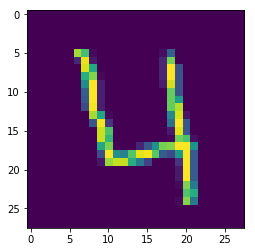

In [14]:
plt.imshow(imm)

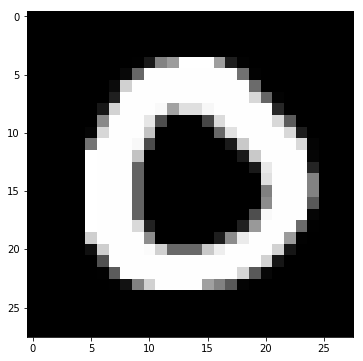

In [18]:
#try to view the image at location 4 (gray scale)
plt.figure(figsize = (8,6))
imm = df2.iloc[4].as_matrix().reshape(28,28)
plt.imshow(imm, cmap= 'gray')

In [20]:
my_labels = df['label'].head(20000)
my_data = (df.drop('label', axis = 1)).head(20000)

In [26]:
#data pre processing 
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

transformed_data = s.fit_transform(my_data)

print(transformed_data.shape)

(20000, 784)


In [28]:
sample_data = transformed_data

## Principal component Analysis

In [29]:
#initialize the pca

from sklearn.decomposition import PCA

pca = PCA()

In [30]:
#defining the PCA components and transforming the data

pca.n_components = 2

pca_data = pca.fit_transform(sample_data)

In [31]:
#columns will be reduced to the number of n_components selected

print('The shape of pca data is: {}'.format(pca_data.shape))

The shape of pca data is: (20000, 2)


In [32]:
#attaching the labels for each 2d data point

pca_data = np.vstack((pca_data.T, my_labels)).T

In [36]:
#convert into a df

pca_df = pd.DataFrame(pca_data, columns= ['First Principal', 'Second Principal', 'Label'])

In [37]:
pca_df.head()

,First Principal,Second Principal,Label
0,-5.060877,-5.430840,1.0
1,19.293138,6.242994,0.0
2,-7.684489,-1.828410,1.0
3,-0.440062,5.585413,4.0
4,26.597766,6.333138,0.0


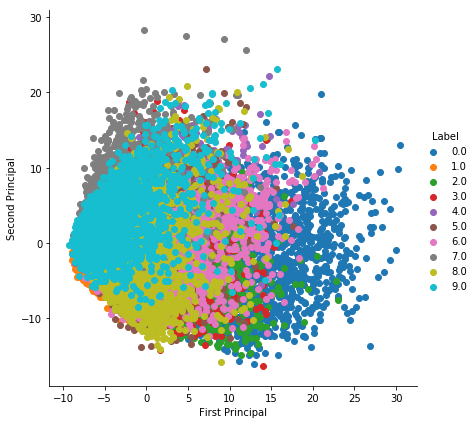

In [45]:
#plot the labels
sns.FacetGrid(pca_df, hue="Label", size=6).map(plt.scatter, 'First Principal', 'Second Principal').add_legend()
plt.show()

## PCA for dimensionality reduction

In [46]:
pca.n_components = 784

pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

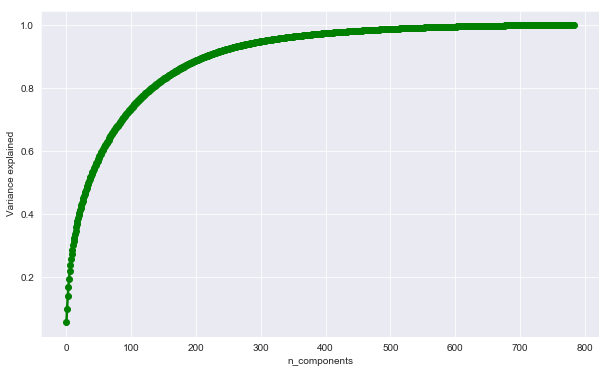

In [57]:
sns.set_style('dark')
plt.figure(figsize = (10,6))
plt.plot(cum_var_explained, linewidth = 2.5, color = 'green', marker = 'o')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Variance explained')
plt.axis('tight')
plt.show()

**As we can see that the amount of variance explained is not significantly increased after the 500 components. 
So it might be a good idea to select the significant components based on PCA**. 